# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [41]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [42]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

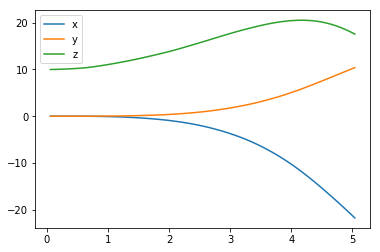

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

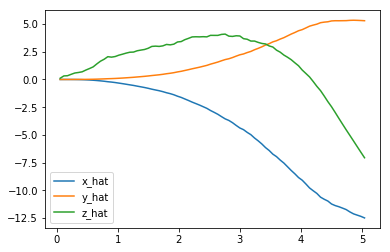

In [44]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

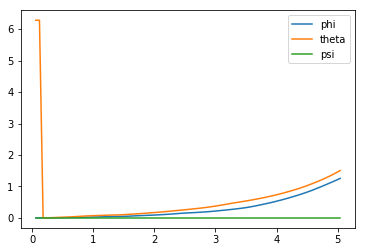

In [45]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

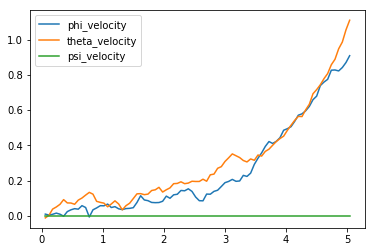

In [46]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

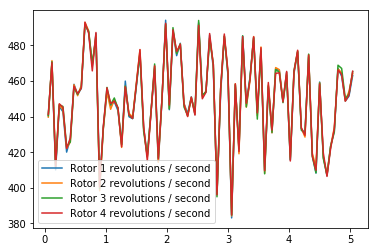

In [47]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [48]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-21.78373666  10.39653605  17.57739787   1.25546135   1.50580302
   0.        ]
[-12.49097549   5.30204457  -7.06228314]
[0.90846756 1.10942051 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [49]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 50
target_pos = np.array([0., 0., 150.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   50, score =   2.834 (best =   3.388), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [50]:
## DONE: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import numpy as np
from random import random

import tensorflow as tf

np.random.seed(0)

time_limit = 20
num_episodes = 2000

# Flying from (x, y, z) = (0, 100, 0) upwards
init_pose = np.array([0., 0., 100., 0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])

task = Task(init_pose, init_velocities, init_angle_velocities, time_limit)
agent = DDPG(task)

all_episode_rewards = []

In [51]:
for episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    episode_reward = 0
    for i in range(time_limit):
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        episode_reward += reward
        if i == time_limit - 1:
            print("\rEpisode = {:4d}, score = {:7.3f}, best = {:7.3f}, total = {:7.3f}"\
                    .format(episode, agent.score, agent.best_score, episode_reward)
                  , end=" ")
            print(task.sim.pose[:3])
            sys.stdout.flush()
            all_episode_rewards.append(episode_reward)
            break

Episode =    1, score =   0.000, best =    -inf, total = 5794.527 [ 4.31058225  3.11440673 96.68152721]
Episode =    2, score =   0.000, best =    -inf, total = 5794.527 [ 4.31058225  3.11440673 96.68152721]
Episode =    3, score =   0.000, best =    -inf, total = 5794.527 [ 4.31058225  3.11440673 96.68152721]
Episode =    4, score = 289.744, best = 304.728, total = 5794.876 [ 4.31335846  3.11782485 96.68687193]
Episode =    5, score = 289.825, best = 307.661, total = 5796.506 [ 4.29310361  3.13125695 96.71054487]
Episode =    6, score = 289.919, best = 307.662, total = 5798.387 [ 4.270991    3.14402826 96.73783587]
Episode =    7, score = 290.025, best = 307.663, total = 5800.510 [ 4.2489308   3.15520059 96.76858173]
Episode =    8, score = 290.145, best = 307.665, total = 5802.907 [ 4.22522985  3.16388627 96.80319115]
Episode =    9, score = 290.277, best = 307.667, total = 5805.547 [ 4.20350212  3.17049643 96.84117335]
Episode =   10, score = 290.422, best = 307.671, total = 5808.43

Episode =   80, score = 307.749, best = 318.704, total = 6154.976 [  3.74221355   6.24276678 101.62127618]
Episode =   81, score = 308.048, best = 319.042, total = 6160.968 [  3.73458395   6.20578546 101.7110371 ]
Episode =   82, score = 308.921, best = 319.374, total = 6178.416 [  3.71935965   6.2122648  101.99408318]
Episode =   83, score = 309.163, best = 319.685, total = 6183.256 [  3.7074913    6.16291058 102.06208898]
Episode =   84, score = 309.508, best = 319.992, total = 6190.166 [  3.68659254   6.1179339  102.1643964 ]
Episode =   85, score = 309.695, best = 320.294, total = 6193.906 [  3.69926748   6.06422998 102.21104301]
Episode =   86, score = 309.845, best = 320.580, total = 6196.909 [  3.69015102   6.02081295 102.24374251]
Episode =   87, score = 309.979, best = 320.854, total = 6199.577 [  3.67743233   5.97974554 102.27078822]
Episode =   88, score = 310.397, best = 321.120, total = 6207.942 [  3.67047881   5.92956381 102.39314262]
Episode =   89, score = 310.485, best

Episode =  157, score = 328.125, best = 342.607, total = 6562.510 [  3.48558452  13.4469137  105.45090985]
Episode =  158, score = 328.703, best = 342.924, total = 6574.051 [  3.48056431  13.54544628 105.60926657]
Episode =  159, score = 329.270, best = 343.232, total = 6585.401 [  3.48288203  13.64447837 105.7651967 ]
Episode =  160, score = 329.854, best = 343.541, total = 6597.079 [  3.48596422  13.74382479 105.9262404 ]
Episode =  161, score = 330.472, best = 343.853, total = 6609.434 [  3.48335151  13.83955067 106.09807817]
Episode =  162, score = 331.110, best = 344.200, total = 6622.200 [  3.4783651   13.93201958 106.27650619]
Episode =  163, score = 331.737, best = 344.583, total = 6634.734 [  3.47554409  14.01986628 106.45237749]
Episode =  164, score = 332.321, best = 344.936, total = 6646.412 [  3.47787814  14.10422986 106.61634002]
Episode =  165, score = 332.932, best = 345.296, total = 6658.642 [  3.4803776   14.18764089 106.78893041]
Episode =  166, score = 333.541, best

Episode =  234, score = 368.973, best = 368.973, total = 7379.453 [  3.21441961  13.33165435 117.7656853 ]
Episode =  235, score = 369.607, best = 369.607, total = 7392.134 [  3.20494487  13.18169581 117.96792826]
Episode =  236, score = 370.183, best = 370.183, total = 7403.669 [  3.19556044  13.04159262 118.1522551 ]
Episode =  237, score = 370.727, best = 370.727, total = 7414.548 [  3.18596511  12.90606924 118.32638973]
Episode =  238, score = 371.198, best = 371.198, total = 7423.964 [  3.17696429  12.78662465 118.47739639]
Episode =  239, score = 371.655, best = 371.655, total = 7433.107 [  3.1677175   12.66785064 118.62421464]
Episode =  240, score = 372.095, best = 372.095, total = 7441.896 [  3.15814683  12.54976786 118.76547258]
Episode =  241, score = 372.502, best = 372.502, total = 7450.038 [  3.14874567  12.43839017 118.89651299]
Episode =  242, score = 372.887, best = 372.887, total = 7457.746 [  3.13934938  12.33104779 119.0207205 ]
Episode =  243, score = 373.282, best

Episode =  311, score = 384.779, best = 384.779, total = 7695.579 [  2.2888849    5.40673944 122.89730956]
Episode =  312, score = 384.805, best = 384.805, total = 7696.099 [  2.27891311   5.3441701  122.90571877]
Episode =  313, score = 384.830, best = 384.830, total = 7696.591 [  2.2689914    5.28238926 122.91366692]
Episode =  314, score = 384.853, best = 384.853, total = 7697.063 [  2.25904257   5.2205506  122.92127896]
Episode =  315, score = 384.875, best = 384.875, total = 7697.497 [  2.24940366   5.16110259 122.92827053]
Episode =  316, score = 384.895, best = 384.895, total = 7697.905 [  2.23989327   5.10280514 122.93483704]
Episode =  317, score = 384.914, best = 384.914, total = 7698.275 [  2.2307839    5.04743313 122.94077894]
Episode =  318, score = 384.931, best = 384.931, total = 7698.628 [  2.22156588   4.99200966 122.94644584]
Episode =  319, score = 384.948, best = 384.948, total = 7698.964 [  2.21252333   4.93704209 122.95181929]
Episode =  320, score = 384.964, best

Episode =  388, score = 385.049, best = 385.128, total = 7700.974 [  1.81202014   2.74813434 122.97701173]
Episode =  389, score = 385.046, best = 385.128, total = 7700.918 [  1.80845187   2.73027563 122.97600684]
Episode =  390, score = 385.043, best = 385.128, total = 7700.861 [  1.80486976   2.7127652  122.97499576]
Episode =  391, score = 385.040, best = 385.128, total = 7700.805 [  1.80146138   2.69560623 122.97399198]
Episode =  392, score = 385.037, best = 385.128, total = 7700.749 [  1.79797701   2.67865544 122.97299344]
Episode =  393, score = 385.035, best = 385.128, total = 7700.693 [  1.79460811   2.66202597 122.97199771]
Episode =  394, score = 385.032, best = 385.128, total = 7700.637 [  1.79127586   2.6457385  122.97101839]
Episode =  395, score = 385.029, best = 385.128, total = 7700.580 [  1.78789352   2.62923647 122.97000239]
Episode =  396, score = 385.026, best = 385.128, total = 7700.523 [  1.78462331   2.61289619 122.96899767]
Episode =  397, score = 385.023, best

Episode =  465, score = 384.870, best = 385.128, total = 7697.406 [  1.62252382   1.85189412 122.9142684 ]
Episode =  466, score = 384.869, best = 385.128, total = 7697.372 [  1.62078863   1.84451373 122.91366694]
Episode =  467, score = 384.867, best = 385.128, total = 7697.333 [  1.61894416   1.8366915  122.91298863]
Episode =  468, score = 384.864, best = 385.128, total = 7697.281 [  1.61650094   1.82621472 122.91208808]
Episode =  469, score = 384.862, best = 385.128, total = 7697.231 [  1.61414343   1.81597554 122.91121994]
Episode =  470, score = 384.859, best = 385.128, total = 7697.181 [  1.61181823   1.80587019 122.91035532]
Episode =  471, score = 384.857, best = 385.128, total = 7697.134 [  1.60950277   1.79618056 122.90953319]
Episode =  472, score = 384.854, best = 385.128, total = 7697.089 [  1.60735962   1.78710034 122.90875485]
Episode =  473, score = 384.852, best = 385.128, total = 7697.047 [  1.60534658   1.77839242 122.90801442]
Episode =  474, score = 384.850, best

Episode =  542, score = 384.776, best = 385.128, total = 7695.513 [  1.52684337   1.47631308 122.88136828]
Episode =  543, score = 384.775, best = 385.128, total = 7695.500 [  1.52609619   1.47388027 122.88114437]
Episode =  544, score = 384.774, best = 385.128, total = 7695.488 [  1.52544669   1.47145085 122.8809262 ]
Episode =  545, score = 384.774, best = 385.128, total = 7695.475 [  1.52472994   1.46898253 122.8807036 ]
Episode =  546, score = 384.773, best = 385.128, total = 7695.462 [  1.52402766   1.46657383 122.88048308]
Episode =  547, score = 384.772, best = 385.128, total = 7695.450 [  1.52333986   1.46426084 122.88027078]
Episode =  548, score = 384.772, best = 385.128, total = 7695.438 [  1.52264614   1.46203725 122.88006859]
Episode =  549, score = 384.771, best = 385.128, total = 7695.427 [  1.52200052   1.45983751 122.87986717]
Episode =  550, score = 384.771, best = 385.128, total = 7695.414 [  1.52132322   1.45751757 122.87965622]
Episode =  551, score = 384.770, best

Episode =  619, score = 384.743, best = 385.128, total = 7694.852 [  1.48813832   1.35197015 122.86988877]
Episode =  620, score = 384.742, best = 385.128, total = 7694.846 [  1.48776066   1.35094006 122.86979309]
Episode =  621, score = 384.742, best = 385.128, total = 7694.841 [  1.48741575   1.34988107 122.86969249]
Episode =  622, score = 384.742, best = 385.128, total = 7694.835 [  1.48711728   1.34887689 122.86959967]
Episode =  623, score = 384.742, best = 385.128, total = 7694.830 [  1.48679381   1.34794117 122.86951366]
Episode =  624, score = 384.741, best = 385.128, total = 7694.825 [  1.48646143   1.3469291  122.86941854]
Episode =  625, score = 384.741, best = 385.128, total = 7694.820 [  1.48616756   1.34601583 122.86933262]
Episode =  626, score = 384.741, best = 385.128, total = 7694.815 [  1.48584348   1.34503838 122.86924078]
Episode =  627, score = 384.740, best = 385.128, total = 7694.810 [  1.48551754   1.34408309 122.86915387]
Episode =  628, score = 384.740, best

Episode =  696, score = 384.728, best = 385.128, total = 7694.564 [  1.46968327   1.29911459 122.86488919]
Episode =  697, score = 384.728, best = 385.128, total = 7694.562 [  1.46955632   1.2987105  122.86485384]
Episode =  698, score = 384.728, best = 385.128, total = 7694.559 [  1.46937664   1.29825505 122.86480562]
Episode =  699, score = 384.728, best = 385.128, total = 7694.557 [  1.46919987   1.29779087 122.86476208]
Episode =  700, score = 384.728, best = 385.128, total = 7694.554 [  1.46905103   1.29730455 122.86471707]
Episode =  701, score = 384.728, best = 385.128, total = 7694.552 [  1.46887707   1.29686502 122.86467586]
Episode =  702, score = 384.727, best = 385.128, total = 7694.550 [  1.46872816   1.29649831 122.86463835]
Episode =  703, score = 384.727, best = 385.128, total = 7694.547 [  1.4685677    1.29607645 122.8645978 ]
Episode =  704, score = 384.727, best = 385.128, total = 7694.545 [  1.46838537   1.29562052 122.86455547]
Episode =  705, score = 384.727, best

Episode =  773, score = 384.722, best = 385.128, total = 7694.433 [  1.46070873   1.27544182 122.86261805]
Episode =  774, score = 384.722, best = 385.128, total = 7694.433 [  1.46062067   1.27528555 122.86260249]
Episode =  775, score = 384.722, best = 385.128, total = 7694.431 [  1.46053549   1.27506984 122.86258328]
Episode =  776, score = 384.722, best = 385.128, total = 7694.430 [  1.46046481   1.27485562 122.86256094]
Episode =  777, score = 384.721, best = 385.128, total = 7694.429 [  1.46041319   1.2747122  122.862548  ]
Episode =  778, score = 384.721, best = 385.128, total = 7694.428 [  1.46028002   1.27453665 122.8625265 ]
Episode =  779, score = 384.721, best = 385.128, total = 7694.427 [  1.46025323   1.27432217 122.86250967]
Episode =  780, score = 384.721, best = 385.128, total = 7694.426 [  1.46017517   1.2741392  122.86249362]
Episode =  781, score = 384.721, best = 385.128, total = 7694.425 [  1.46007777   1.27392446 122.86247042]
Episode =  782, score = 384.721, best

Episode =  850, score = 384.719, best = 385.128, total = 7694.375 [  1.45672236   1.26476456 122.8616075 ]
Episode =  851, score = 384.719, best = 385.128, total = 7694.375 [  1.45666651   1.26465104 122.86159902]
Episode =  852, score = 384.719, best = 385.128, total = 7694.375 [  1.45662467   1.2646176  122.86159248]
Episode =  853, score = 384.719, best = 385.128, total = 7694.374 [  1.4566109    1.26450031 122.86158424]
Episode =  854, score = 384.719, best = 385.128, total = 7694.374 [  1.45658063   1.26441199 122.8615766 ]
Episode =  855, score = 384.719, best = 385.128, total = 7694.373 [  1.45656695   1.26435975 122.86156988]
Episode =  856, score = 384.719, best = 385.128, total = 7694.373 [  1.45648504   1.26426296 122.86156065]
Episode =  857, score = 384.719, best = 385.128, total = 7694.372 [  1.45647653   1.26418526 122.86155564]
Episode =  858, score = 384.719, best = 385.128, total = 7694.372 [  1.45645624   1.26408738 122.86154711]
Episode =  859, score = 384.719, best

Episode =  927, score = 384.718, best = 385.128, total = 7694.350 [  1.45484143   1.2601653  122.86117139]
Episode =  928, score = 384.718, best = 385.128, total = 7694.350 [  1.45483154   1.26006905 122.86116589]
Episode =  929, score = 384.717, best = 385.128, total = 7694.350 [  1.45479895   1.26006827 122.86116361]
Episode =  930, score = 384.717, best = 385.128, total = 7694.350 [  1.45479724   1.26006038 122.86116219]
Episode =  931, score = 384.717, best = 385.128, total = 7694.349 [  1.45478581   1.25997527 122.86115455]
Episode =  932, score = 384.717, best = 385.128, total = 7694.349 [  1.4547477    1.25991746 122.86114916]
Episode =  933, score = 384.717, best = 385.128, total = 7694.349 [  1.4547393    1.25987922 122.86114658]
Episode =  934, score = 384.717, best = 385.128, total = 7694.349 [  1.45468628   1.25987109 122.8611422 ]
Episode =  935, score = 384.717, best = 385.128, total = 7694.349 [  1.45468131   1.25982583 122.86113942]
Episode =  936, score = 384.717, best

Episode = 1004, score = 384.717, best = 385.128, total = 7694.338 [  1.45390246   1.25788787 122.86095962]
Episode = 1005, score = 384.717, best = 385.128, total = 7694.338 [  1.45390246   1.25788787 122.86095962]
Episode = 1006, score = 384.717, best = 385.128, total = 7694.338 [  1.45390246   1.25788787 122.86095962]
Episode = 1007, score = 384.717, best = 385.128, total = 7694.338 [  1.45389563   1.25788737 122.86095828]
Episode = 1008, score = 384.717, best = 385.128, total = 7694.338 [  1.45389523   1.25788677 122.86095803]
Episode = 1009, score = 384.717, best = 385.128, total = 7694.338 [  1.45387638   1.25783932 122.86095535]
Episode = 1010, score = 384.717, best = 385.128, total = 7694.338 [  1.45387139   1.25783178 122.86095254]
Episode = 1011, score = 384.717, best = 385.128, total = 7694.338 [  1.4538879    1.2578112  122.86095206]
Episode = 1012, score = 384.717, best = 385.128, total = 7694.338 [  1.4538825    1.25777147 122.86094846]
Episode = 1013, score = 384.717, best

Episode = 1081, score = 384.717, best = 385.128, total = 7694.333 [  1.45346321   1.25700353 122.86087001]
Episode = 1082, score = 384.717, best = 385.128, total = 7694.333 [  1.4534604    1.25697379 122.86086857]
Episode = 1083, score = 384.717, best = 385.128, total = 7694.333 [  1.4534604    1.25697379 122.86086857]
Episode = 1084, score = 384.717, best = 385.128, total = 7694.333 [  1.4534604    1.25697379 122.86086857]
Episode = 1085, score = 384.717, best = 385.128, total = 7694.333 [  1.45346033   1.25697372 122.86086856]
Episode = 1086, score = 384.717, best = 385.128, total = 7694.333 [  1.45346033   1.25697372 122.86086856]
Episode = 1087, score = 384.717, best = 385.128, total = 7694.333 [  1.45345734   1.25693644 122.86086734]
Episode = 1088, score = 384.717, best = 385.128, total = 7694.333 [  1.45345734   1.25693644 122.86086734]
Episode = 1089, score = 384.717, best = 385.128, total = 7694.333 [  1.45345496   1.25691824 122.86086572]
Episode = 1090, score = 384.717, best

Episode = 1158, score = 384.717, best = 385.128, total = 7694.331 [  1.45330446   1.25652537 122.86082879]
Episode = 1159, score = 384.717, best = 385.128, total = 7694.331 [  1.45325738   1.25652032 122.86082536]
Episode = 1160, score = 384.717, best = 385.128, total = 7694.331 [  1.45325975   1.25653853 122.86082717]
Episode = 1161, score = 384.717, best = 385.128, total = 7694.331 [  1.45325975   1.25653853 122.86082717]
Episode = 1162, score = 384.717, best = 385.128, total = 7694.331 [  1.45325935   1.25653794 122.86082691]
Episode = 1163, score = 384.717, best = 385.128, total = 7694.331 [  1.4532572    1.25652398 122.86082531]
Episode = 1164, score = 384.717, best = 385.128, total = 7694.331 [  1.4532572    1.25652398 122.86082531]
Episode = 1165, score = 384.717, best = 385.128, total = 7694.331 [  1.4532572    1.25652398 122.86082531]
Episode = 1166, score = 384.717, best = 385.128, total = 7694.331 [  1.4532572    1.25652398 122.86082531]
Episode = 1167, score = 384.717, best

Episode = 1235, score = 384.716, best = 385.128, total = 7694.329 [  1.45311957   1.25630653 122.86080073]
Episode = 1236, score = 384.716, best = 385.128, total = 7694.329 [  1.45311957   1.25630653 122.86080073]
Episode = 1237, score = 384.716, best = 385.128, total = 7694.329 [  1.45311957   1.25630653 122.86080073]
Episode = 1238, score = 384.716, best = 385.128, total = 7694.329 [  1.45311677   1.25627679 122.86079929]
Episode = 1239, score = 384.716, best = 385.128, total = 7694.329 [  1.45311677   1.25627679 122.86079929]
Episode = 1240, score = 384.716, best = 385.128, total = 7694.329 [  1.45311677   1.25627679 122.86079929]
Episode = 1241, score = 384.716, best = 385.128, total = 7694.329 [  1.45311677   1.25627679 122.86079929]
Episode = 1242, score = 384.716, best = 385.128, total = 7694.329 [  1.45311677   1.25627679 122.86079929]
Episode = 1243, score = 384.716, best = 385.128, total = 7694.329 [  1.45311677   1.25627679 122.86079929]
Episode = 1244, score = 384.716, best

Episode = 1312, score = 384.716, best = 385.128, total = 7694.329 [  1.45310824   1.2562186  122.86079334]
Episode = 1313, score = 384.716, best = 385.128, total = 7694.329 [  1.45310824   1.2562186  122.86079334]
Episode = 1314, score = 384.716, best = 385.128, total = 7694.329 [  1.45310824   1.2562186  122.86079334]
Episode = 1315, score = 384.716, best = 385.128, total = 7694.329 [  1.45306912   1.25621825 122.86079235]
Episode = 1316, score = 384.716, best = 385.128, total = 7694.329 [  1.45306912   1.25621825 122.86079235]
Episode = 1317, score = 384.716, best = 385.128, total = 7694.329 [  1.45306912   1.25621825 122.86079235]
Episode = 1318, score = 384.716, best = 385.128, total = 7694.329 [  1.4530672    1.25620768 122.86079082]
Episode = 1319, score = 384.716, best = 385.128, total = 7694.329 [  1.4530672    1.25620768 122.86079082]
Episode = 1320, score = 384.716, best = 385.128, total = 7694.329 [  1.4530672    1.25620768 122.86079082]
Episode = 1321, score = 384.716, best

Episode = 1389, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1390, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1391, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1392, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1393, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1394, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1395, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1396, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1397, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1398, score = 384.716, best

Episode = 1466, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1467, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1468, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1469, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1470, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1471, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1472, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1473, score = 384.716, best = 385.128, total = 7694.328 [  1.45305727   1.25612236 122.86078459]
Episode = 1474, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1475, score = 384.716, best

Episode = 1543, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1544, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1545, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1546, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1547, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1548, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1549, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1550, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1551, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1552, score = 384.716, best

Episode = 1620, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1621, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1622, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1623, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1624, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1625, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1626, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1627, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1628, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1629, score = 384.716, best

Episode = 1697, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1698, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1699, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1700, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1701, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1702, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1703, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1704, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1705, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1706, score = 384.716, best

Episode = 1774, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1775, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1776, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1777, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1778, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1779, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1780, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1781, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1782, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1783, score = 384.716, best

Episode = 1851, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1852, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1853, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1854, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1855, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1856, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1857, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1858, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1859, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1860, score = 384.716, best

Episode = 1928, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1929, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1930, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1931, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1932, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1933, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1934, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1935, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1936, score = 384.716, best = 385.128, total = 7694.328 [  1.45305428   1.25608508 122.86078337]
Episode = 1937, score = 384.716, best

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

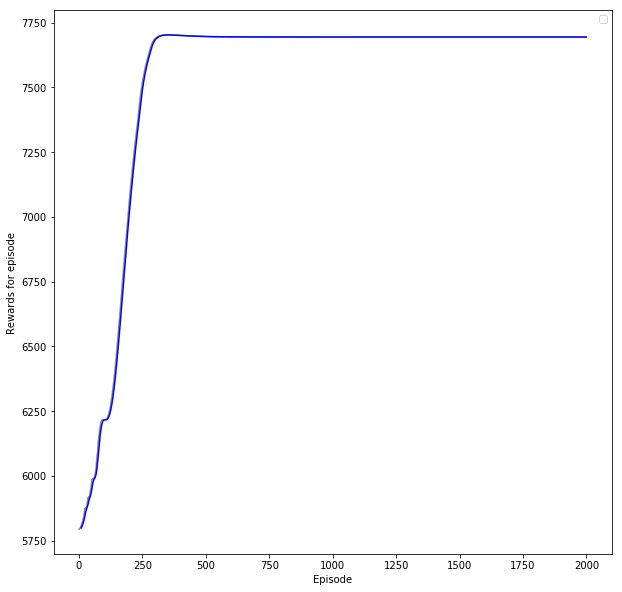

In [52]:
# DONE: Plot the rewards.
%matplotlib inline
import matplotlib.pyplot as plt

def moving_average (values, periods):
    """ Calculate the moving average"""
    weights = np.repeat(1.0, periods) / periods
    ma = np.convolve(values, weights, 'valid')
    return ma

def plot_rewards(rewards, moving_average_periods):
    """ Generate a plot for the rewards and the moving average"""
    plt.figure().set_size_inches(10, 10)
    plt.xlabel('Episode')
    plt.ylabel('Rewards for episode')
    plt.legend(['Reward', 'Moving average over ' + str(moving_average_periods) + ' periods'])
    indices = np.arange(len(rewards))
    np_rewards = np.array(rewards)
    plt.plot(indices, np_rewards, color='grey', alpha=0.9)
    averaged = moving_average(np_rewards, moving_average_periods)
    plt.plot(indices[moving_average_periods - 1:], averaged, color='blue')
    plt.show()

plot_rewards(all_episode_rewards, moving_average_periods=10)


## Position as funtion of time

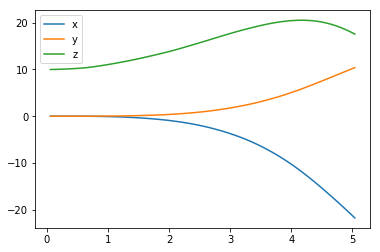

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
#### Task:
I am flying from (x,y,z) = (100, 100, 100) to (150, 150, 150). At first I tried lower altitudes but I did not get that to work. My guess is that the agent does not get a chance to learn if it crashed to the ground. So I tried a high altitude and flew higher away from the ground, and that worked.
#### Reward:
The reward function is mostly based on the distance between the current position and the target position. This is calulated by ```np.linalg.norm(self.sim.pose[:3] - self.target_pos[:3]).```
To reduce the posibility of a wide variation in reward this is led through a tanh function. so the reward function is
```reward = alpha * (1 - np.tanh(np.linalg.norm(self.sim.pose[:3] - self.target_pos[:3])))```. I wanted the quadcopter to fly to the target postion and hover there. So at the end I want the speed  and angular speed to be close to 0. So the total reward function becomes 
```
reward = alphaP * (1 - np.tanh(np.linalg.norm(self.sim.pose[:3] - self.target_pos[:3])))
reward += alphaV * (1 - np.tanh(np.linalg.norm(self.sim.v - self.target_vel[:3])))
reward += alphsA * (1 - np.tanh(np.linalg.norm(self.sim.angular_v - self.target_vel[3:])))
```
I find the speed much less important than the distance (otherwise the agent would be rewarded for hovering instead of moving to the target) so alphaP = 0.3, alphaV = 0.03, and alphaA = 0.01.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I went with the DDPG actor-critic method. It was the first choice from the start. Mainly because there were five pages about actor critic DDPG agent mainbuffer and ounoise in the project description, which I took as a hint that Udacity wanted me to go with DDPG.
I tried batch normalization, dropout, adding extra hidden layers and so on. These attepts didn't get me a higher reward or a faster learning rate so I reverted back to the actor and critic that was given by udacity. The only change I made in Actor and critic was in the optimizer I had set the value quite low
```
# Define optimizer and training function
optimizer = optimizers.Adam(lr=1e-6)

```
This made a huge improvement in the learning proces.

As mentioned above I went with the given actor and critic. As can be seen in the agents/actor.py file the model consists of 3 dense layers wich are ReLU activated. This is follwed with layer with a sigmoid activation function to normalize from 0 to 1. Finally a keras lambda layer re-normalizes the actions to the expected action range.

The agents/critic.py file shows that the critic includes a separate state and action neural nets, which are then combined to capture the joint state for making the model output.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

First I defined a flight at low altitudes that did not work.
The I defined a hover task at low altitude point (10,10,10) to be precise. That did not work either. At some point I developed the theory that the agent crashed before it could learn. So I changed thehover task to hover at (100, 100, 100) I got that to work (meaning the agent learned) but it took a lot of tweaking for multiple parameters such as the learning rate, random seed, the reward function, noise. When I got that to work. I changed the task one more time to fly from the original hover point (100, 100, 100) to (150, 150, 150). So this was by no means an easy task.

Well I definately had e learning curve in this project with multiple aha moments. however I assume the agent is meant in this question. For this final task shown above the learning proces was gradual. the agent learned in 50 episodes. 

The final performance is 0.250 per episode.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

At first I was very enthousiastic and thought of a complex flight path. That did not work out so well. So I started with a hover task. First at low hights and when that didn't work I opted to hover at (x, y, z) = (100, 100, 100). That worked well enough for me to tweak all the parameters I could think of. That was the hardest part of the project. Then I let the quadcopter fly from (100, 100, 100) to (150, 150, 150)
What I think most interesting is that the agent was easy to train to hover at (100, 100, 100) but not at (10, 10, 10). Apparently the agent needs to have some space to fall before finding hte right track.